In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.ticker import FormatStrFormatter
import numpy as np

In [95]:
plt.rcParams['figure.figsize'] = [10, 6]

# Extrapolating Future Performance of Quantum Reservoir vs Classical Reservoir

## Load Data and Filter the smallest number of neurons or train data size to apoproach/outperform the qantum reservoir

In [2]:
MAINPATH = os.getcwd()

In [9]:
sine_4 = pd.read_csv(MAINPATH+"/sine/4_sine_grid.csv", header=0)

sine_4["train_mae"]=sine_4["train_mae"].astype(float)
sine_4["test_mae"]=sine_4["test_mae"].astype(float)


# get row with the best performing instance
best_sine_q = sine_4[sine_4.test_mae == sine_4.test_mae.min()]

# get train length and atom numberfor best performing instance
best_sine_q_trainlen = best_sine_q["train_len"]
best_sine_q_nb_atoms = 4

In [41]:
classical_rc_sine = pd.read_csv(MAINPATH+"/sine/classical_grid.csv", header=0)
classical_rc_sine.drop(classical_rc_sine[classical_rc_sine['input_data'] == 'mackey'].index, inplace = True)

smallest_neuron_sine = classical_rc_sine[classical_rc_sine['test_mae']<=sine_4.test_mae.min()].nsmallest(1, 'neuron_number')
smallest_train_sine = classical_rc_sine[classical_rc_sine['test_mae']<=sine_4.test_mae.min()].nsmallest(1, 'train_len')

In [42]:
smallest_train_sine

,input_data,train_len,test_len,neuron_number,sample_len,train_mae,test_mae
7,sine,250,30,11,2,0.005829,0.005479


In [47]:
smallest_neuron_sine

,input_data,train_len,test_len,neuron_number,sample_len,train_mae,test_mae
83,sine,400,30,6,2,0.026303,0.014968


In [35]:
mackey_9 = pd.read_csv(MAINPATH+"/sine/9_sine_grid.csv", header=0)

# results for sine and mackey are in the same csv file, so we filter out the data we are interested in
mackey_9.drop(mackey_9[mackey_9['input_data'] == 'sine'].index, inplace = True) 

mackey_9["train_mae"]=mackey_9["train_mae"].astype(float)
mackey_9["test_mae"]=mackey_9["test_mae"].astype(float)

# get row with the best performing instance
best_mackey_q = mackey_9[mackey_9.test_mae == mackey_9.test_mae.min()]

# get train length and atom numberfor best performing instance
best_mackey_q_trainlen = best_mackey_q["train_len"]
best_mackey_q_nb_atoms = 4

In [36]:
best_mackey_q

,input_data,train_len,test_len,inp_duration,N_samples,sample_len,reset_rate,nb_atoms,geometry,atom_distance,train_mae,test_mae
146,mackey,250,30,1000,1024,8,0,9,grid_lattice_centred,15,5.397427e-15,0.011817


In [44]:
classical_rc_mackey = pd.read_csv(MAINPATH+"/sine/classical_grid.csv", header=0)
classical_rc_mackey.drop(classical_rc_mackey[classical_rc_mackey['input_data'] == 'sine'].index, inplace = True)

smallest_neuron_mackey = classical_rc_mackey[classical_rc_mackey['test_mae']<=mackey_9.test_mae.min()].nsmallest(1, 'neuron_number')
smallest_train_mackey = classical_rc_mackey[classical_rc_mackey['test_mae']<=mackey_9.test_mae.min()].nsmallest(1, 'train_len')

In [55]:
smallest_neuron_mackey

,input_data,train_len,test_len,neuron_number,sample_len,train_mae,test_mae
335,mackey,500,30,15,8,0.008251,0.009784


In [46]:
smallest_train_mackey

,input_data,train_len,test_len,neuron_number,sample_len,train_mae,test_mae
335,mackey,500,30,15,8,0.008251,0.009784


In [130]:
# no smallest neuron for 250 train data exists for the classical reservoir, so we set it to 100
neuron_evolution = [smallest_neuron_sine.neuron_number, 100] 
neuron_evolution_extrapol = [smallest_neuron_sine.neuron_number, 100, 300] 
train_evolution_classical = [smallest_train_sine.train_len, smallest_train_mackey.train_len]
train_evolution_classical_extrapol = [smallest_train_sine.train_len, smallest_train_mackey.train_len, 2000]

atom_evolution = [4, 9]
atom_evolution_extrapol = [4, 9, 40]
train_evolution_quantum = [best_sine_q_trainlen, best_sine_q_trainlen]
train_evolution_quantum_extrapol = [best_sine_q_trainlen, best_sine_q_trainlen, 600]

## Analysis and Extrapolations

We find that for the simple sine curve, 11 neurons are necessary to outperform our quantum reservoir. Alternatively, we can achieve similar performance as the quantum reservoir with 6 neurons, by increasing the training size to 400.

For the much more complex Mackey Glass (which is chaotic and nonlinear), we could not find any neuron number that was able to approach the performance of the quantum reservoir with the same amout of training data. Only when doubling the training data from 250 to 500, AND increasing the neuron number to 15, were we able to achieve similar preformance as the quantum reservoir.

This suggests that as the complexity of the data set increases, the number of data points necessary for the classical reservoir to perform similarly to the quantum reservoir increases significantly, as well as the neuron number.

In previous research it has been shown that classical reservoirs struggle once the data becomes too complex or irregular, which is where large deep learning models with high energy and time consumption become necessary. In particular, for both of these classical models a very large data set is necesary.

Given our preliminary results on the quantum reservoir, it seems that slightly increasing the atom number from 4 to 9, our quantum reservoir is able to achieve comparable performances on both the very simple sine data set, and the much more complex mackey glass. Note in particular that the size of the training set does not change, which leads us to believe that the quantum reservoir requires significantly less data than a classical reservoir or a deep learning model to achieve satisfactory performance.

As the problem size scales up to an industrial application, such as the data set of real-time power generation of a wind turbine between 2019 and 2021, the classical reservoir performs best at 1000 neurons, achieving a test performance of 4\% (see notebook CRCvsRNN), using 11629 training points. We expect the quantum reservoir to be able to perfomr similar precision with a much smaller number of atoms and training size. This is illustrated in the following figures

/home/naomichmielewski/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/home/naomichmielewski/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


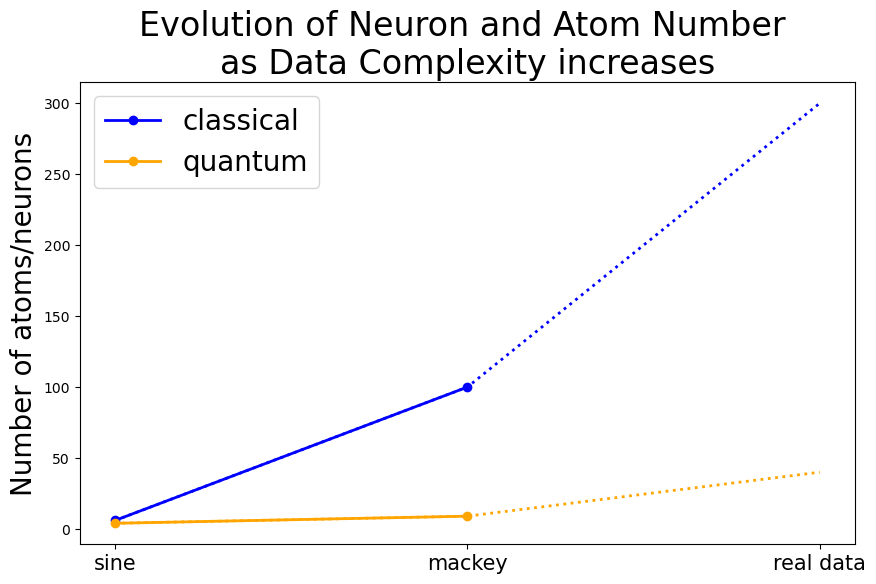

In [131]:
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=10)

x_ticks_labels = ['sine','mackey']
x_ticks_labels_extrapol = ['sine','mackey','real data']


fig, ax = plt.subplots(1,1) 

ax.plot(x_ticks_labels, neuron_evolution,  'o-',  linewidth=2, color='blue', label="classical")
ax.plot(x_ticks_labels_extrapol, neuron_evolution_extrapol,  ':',  linewidth=2, color='blue')
ax.plot(x_ticks_labels, atom_evolution, 'o-',  linewidth=2, color='orange', label='quantum')
ax.plot(x_ticks_labels_extrapol, atom_evolution_extrapol, ':',  linewidth=2, color='orange')

plt.ylabel('Number of atoms/neurons')
plt.title('Evolution of Neuron and Atom Number \nas Data Complexity increases')
plt.legend()
plt.show()

/home/naomichmielewski/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/home/naomichmielewski/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


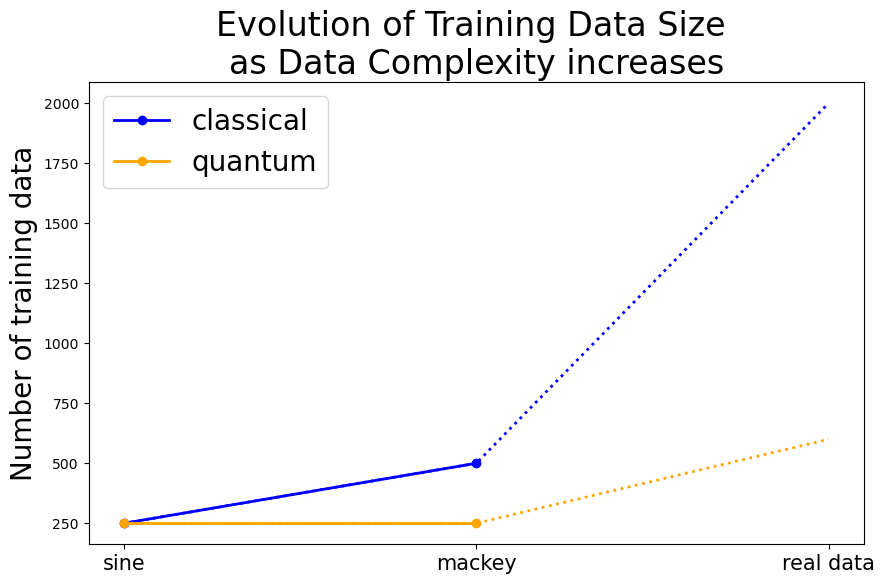

In [132]:
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=10)

x_ticks_labels = ['sine','mackey']
x_ticks_labels_extrapol = ['sine','mackey','real data']


fig, ax = plt.subplots(1,1) 

ax.plot(x_ticks_labels, train_evolution_classical,  'o-',  linewidth=2, color='blue', label="classical")
ax.plot(x_ticks_labels_extrapol, train_evolution_classical_extrapol,  ':',  linewidth=2, color='blue')
ax.plot(x_ticks_labels, train_evolution_quantum, 'o-',  linewidth=2, color='orange', label='quantum')
ax.plot(x_ticks_labels_extrapol, train_evolution_quantum_extrapol, ':',  linewidth=2, color='orange')

plt.ylabel('Number of training data')
plt.title('Evolution of Training Data Size \nas Data Complexity increases')
plt.legend()
plt.show()